## skysubtraction (next dither)

In [1]:
import glob
import getpass
import os
try:
    from astropy.io import fits as pf
except:
    import pyfits as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

skysub_ch1 = glob.glob('*fgs_ch1.fits')
skysub_ch1.sort()
skysub_ch2 = glob.glob('*fgs_ch2.fits')
skysub_ch2.sort()

In [2]:
nframes = 3
wpangle=4
ndither=5

for i in range(12):
    hdr1 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    hdr2 = pf.getheader(skysub_ch1[i+nframes*wpangle])['I_DTHPOS']
    #print('{0} - {1}'.format(i,i+nframes))
    print('{0} - {1}'.format(hdr1, hdr2))
for i in range(len(skysub_ch1)-(nframes*wpangle)):
    hdr1 = pf.getheader(skysub_ch1[i+nframes*wpangle])['I_DTHPOS']
    hdr2 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    #print('{0} - {1}'.format(i+nframes,i))
    print('{0} - {1}'.format(hdr1, hdr2))

1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP67.5 - 3 : WP67.5
4 : WP67.5 - 3 :

In [3]:
len(skysub_ch1)

60

In [4]:
len(skysub_ch2)

60

## Check sky-subtracted frames

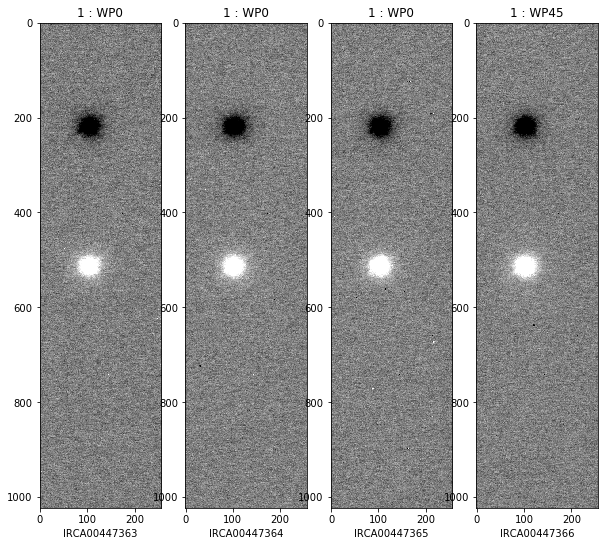

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.visualization import ZScaleInterval
interval= ZScaleInterval()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[:4]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

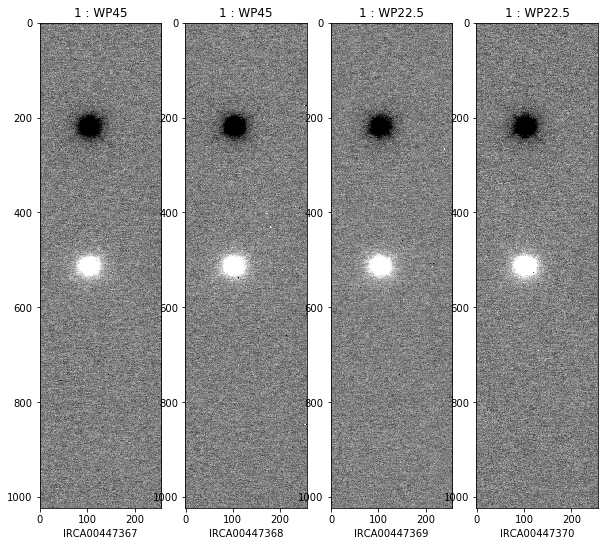

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[4:8]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

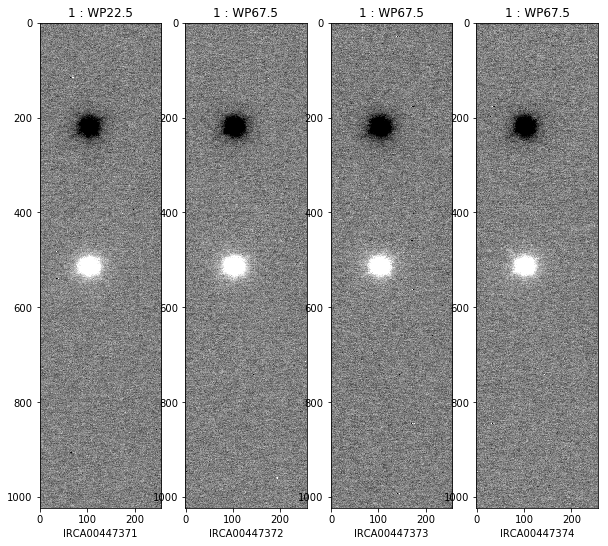

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[8:12]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

In [8]:
#load all images into dict
img_ch1 = {}
img_ch2 = {}

for idx,i in enumerate(skysub_ch1):
    hdr = pf.getheader(i)['I_DTHPOS']
    img = pf.getdata(i)
    img_ch1[hdr] = img
    
for idx,j in enumerate(skysub_ch2):
    hdr = pf.getheader(j)['I_DTHPOS']
    img = pf.getdata(j)
    print(hdr)
    img_ch2[hdr] = img

1 : WP0
1 : WP0
1 : WP0
1 : WP45
1 : WP45
1 : WP45
1 : WP22.5
1 : WP22.5
1 : WP22.5
1 : WP67.5
1 : WP67.5
1 : WP67.5
2 : WP0
2 : WP0
2 : WP0
2 : WP45
2 : WP45
2 : WP45
2 : WP22.5
2 : WP22.5
2 : WP22.5
2 : WP67.5
2 : WP67.5
2 : WP67.5
3 : WP0
3 : WP0
3 : WP0
3 : WP45
3 : WP45
3 : WP45
3 : WP22.5
3 : WP22.5
3 : WP22.5
3 : WP67.5
3 : WP67.5
3 : WP67.5
4 : WP0
4 : WP0
4 : WP0
4 : WP45
4 : WP45
4 : WP45
4 : WP22.5
4 : WP22.5
4 : WP22.5
4 : WP67.5
4 : WP67.5
4 : WP67.5
5 : WP0
5 : WP0
5 : WP0
5 : WP45
5 : WP45
5 : WP45
5 : WP22.5
5 : WP22.5
5 : WP22.5
5 : WP67.5
5 : WP67.5
5 : WP67.5


## 3 waveplate rotation sets

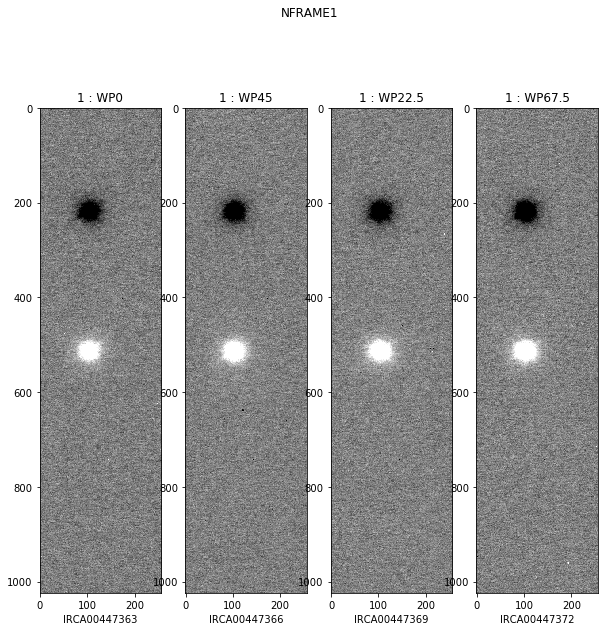

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
idx=0
for i in skysub_ch1[:12][::3]:
    hdr = pf.getheader(i)
    img = pf.getdata(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    plt.suptitle('NFRAME1')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

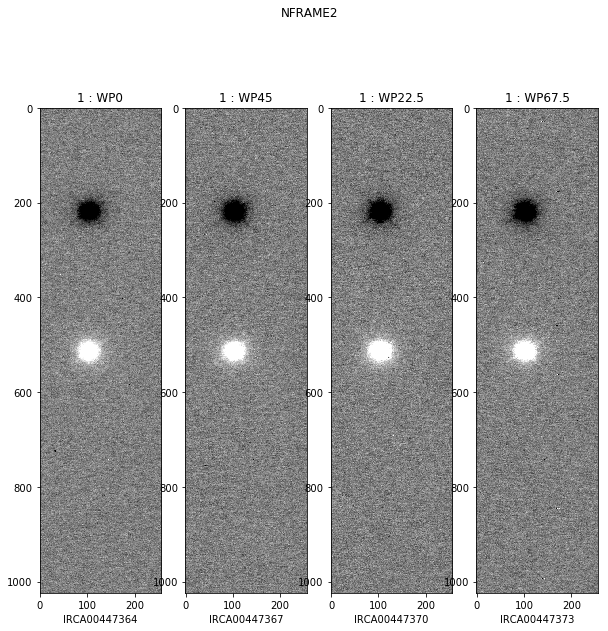

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
idx=0
for i in range(12)[::3]:
    hdr = pf.getheader(skysub_ch1[i+1])
    img = pf.getdata(skysub_ch1[i+1])
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    plt.suptitle('NFRAME2')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

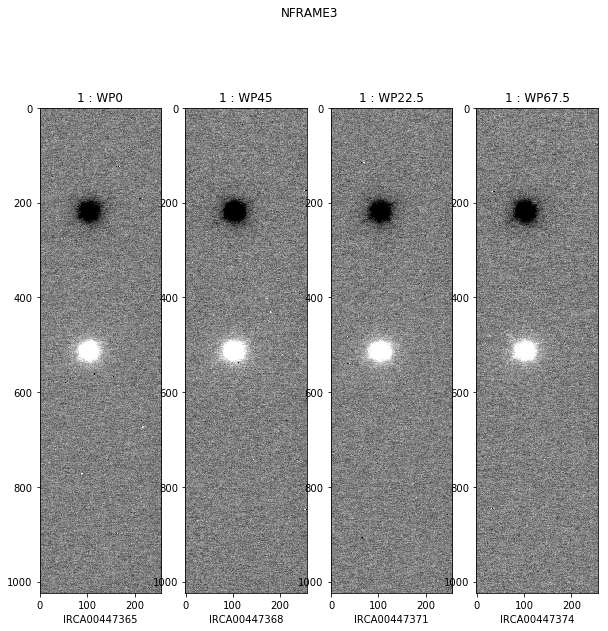

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
idx=0
for i in range(12)[::3]:
    hdr = pf.getheader(skysub_ch1[i+2])
    img = pf.getdata(skysub_ch1[i+2])
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    plt.suptitle('NFRAME3')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

## combine I images (dither 1)

In [12]:
I = {}

for i in range(len(skysub_ch1)):
    hdr = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i])
    img2 = pf.getdata(skysub_ch2[i])
    I[i] = img1 + img2
    print(hdr)

1 : WP0
1 : WP0
1 : WP0
1 : WP45
1 : WP45
1 : WP45
1 : WP22.5
1 : WP22.5
1 : WP22.5
1 : WP67.5
1 : WP67.5
1 : WP67.5
2 : WP0
2 : WP0
2 : WP0
2 : WP45
2 : WP45
2 : WP45
2 : WP22.5
2 : WP22.5
2 : WP22.5
2 : WP67.5
2 : WP67.5
2 : WP67.5
3 : WP0
3 : WP0
3 : WP0
3 : WP45
3 : WP45
3 : WP45
3 : WP22.5
3 : WP22.5
3 : WP22.5
3 : WP67.5
3 : WP67.5
3 : WP67.5
4 : WP0
4 : WP0
4 : WP0
4 : WP45
4 : WP45
4 : WP45
4 : WP22.5
4 : WP22.5
4 : WP22.5
4 : WP67.5
4 : WP67.5
4 : WP67.5
5 : WP0
5 : WP0
5 : WP0
5 : WP45
5 : WP45
5 : WP45
5 : WP22.5
5 : WP22.5
5 : WP22.5
5 : WP67.5
5 : WP67.5
5 : WP67.5


In [13]:
#nframe1
for i in range(len(skysub_ch1))[::3]:
    hdr = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    print(hdr)

1 : WP0
1 : WP45
1 : WP22.5
1 : WP67.5
2 : WP0
2 : WP45
2 : WP22.5
2 : WP67.5
3 : WP0
3 : WP45
3 : WP22.5
3 : WP67.5
4 : WP0
4 : WP45
4 : WP22.5
4 : WP67.5
5 : WP0
5 : WP45
5 : WP22.5
5 : WP67.5


In [14]:
#nframe2
for i in range(len(skysub_ch1))[::3]:
    hdr = pf.getheader(skysub_ch1[i+1])['I_DTHPOS']
    print(hdr)

1 : WP0
1 : WP45
1 : WP22.5
1 : WP67.5
2 : WP0
2 : WP45
2 : WP22.5
2 : WP67.5
3 : WP0
3 : WP45
3 : WP22.5
3 : WP67.5
4 : WP0
4 : WP45
4 : WP22.5
4 : WP67.5
5 : WP0
5 : WP45
5 : WP22.5
5 : WP67.5


In [15]:
#nframe3
for i in range(len(skysub_ch1))[::3]:
    hdr = pf.getheader(skysub_ch1[i+2])['I_DTHPOS']
    print(hdr)

1 : WP0
1 : WP45
1 : WP22.5
1 : WP67.5
2 : WP0
2 : WP45
2 : WP22.5
2 : WP67.5
3 : WP0
3 : WP45
3 : WP22.5
3 : WP67.5
4 : WP0
4 : WP45
4 : WP22.5
4 : WP67.5
5 : WP0
5 : WP45
5 : WP22.5
5 : WP67.5


In [16]:
#I.keys()
#split I into each nframe: 10 I image each dict
I1 = {}
I2 = {}
I3 = {}

m=0
for i in range(len(skysub_ch1))[::3]:
    hdr1 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    #ch1
    img1 = pf.getdata(skysub_ch1[i])
    #ch2
    img2 = pf.getdata(skysub_ch2[i])
    I1[m] = img1 + img2
    m+=1

n=0
for i in range(len(skysub_ch1))[::3]:
    hdr2 = pf.getheader(skysub_ch1[i+1])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i+1])
    img2 = pf.getdata(skysub_ch2[i+1])
    I2[n] = img1 + img2
    n+=1
    
o=0
for i in range(len(skysub_ch1))[::3]:
    hdr1 = pf.getheader(skysub_ch1[i+2])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i+2])
    img2 = pf.getdata(skysub_ch2[i+2])
    I3[o] = img1 + img2
    o+=1

In [17]:
len(I1)

20

In [22]:
Q1 = {}
Q2 = {}
Q3 = {}
U1 = {}
U2 = {}
U3 = {}

for i in range(len(I1))[::4]:
    #5 Q image each 
    Q1[i]=I1[i]-I1[i+1]
    #5 U image each
    U1[i]=I1[i+2]-I1[i+3]
    
for j in range(len(I2))[::4]:
    Q2[j]=I2[j]-I2[j+1]
    U2[j]=I2[j+2]-I2[j+3]
    
for k in range(len(I3))[::4]:
    Q3[k]=I3[k]-I3[k+1]
    U3[k]=I3[k+2]-I3[k+3]
    

In [23]:
len(Q1)

5

In [24]:
len(U1)

5

In [30]:
Q2.keys()

[0, 8, 4, 12, 16]

In [65]:
PI1={}
PI2={}
PI3={}

for i,q in enumerate(Q1.keys()):
    #5 PI image each
    PI1[i]=np.sqrt(Q1[q]**2+U1[q]**2)
    PI2[i]=np.sqrt(Q2[q]**2+U2[q]**2)
    PI3[i]=np.sqrt(Q3[q]**2+U3[q]**2)

In [39]:
len(PI1)

5

## Q

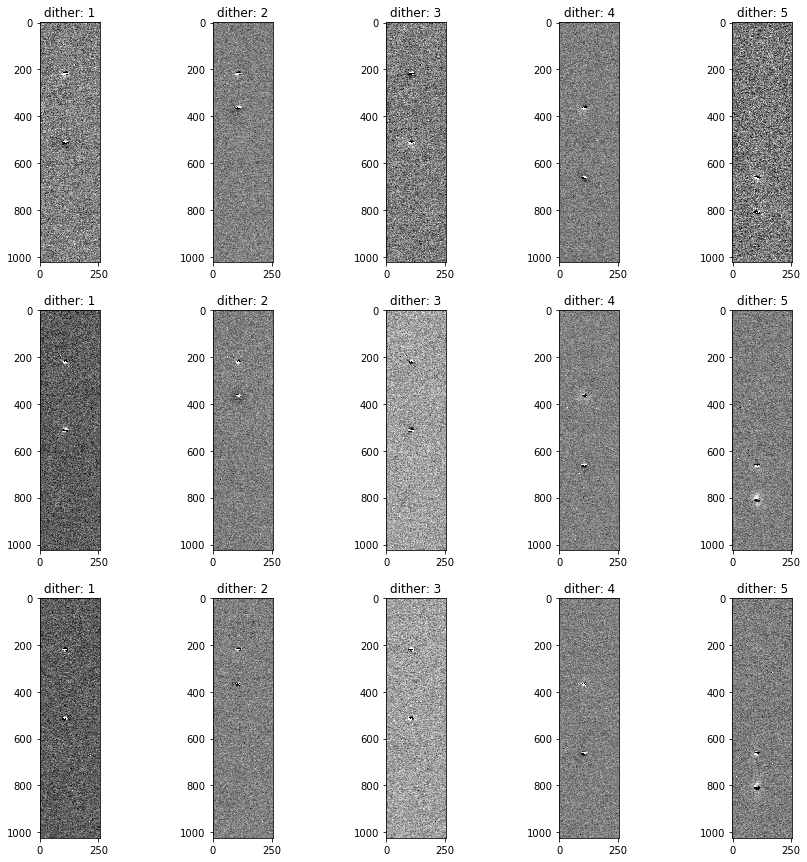

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for n,key in enumerate(Q1.keys()):
    vmin1, vmax1 = interval.get_limits(Q1[key])
    vmin2, vmax2 = interval.get_limits(Q2[key])
    vmin3, vmax3 = interval.get_limits(Q2[key])
    
    #Q1: nframe1
    ax[0,n].imshow(Q1[key], vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[0,n].set_title('dither: {}'.format(n+1))
    #Q2: nframe2
    ax[1,n].imshow(Q2[key], vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[1,n].set_title('dither: {}'.format(n+1))
    #Q3 nframe3
    ax[2,n].imshow(Q3[key], vmin=vmin3, vmax=vmax3, cmap='gray')
    ax[2,n].set_title('dither: {}'.format(n+1))

## U

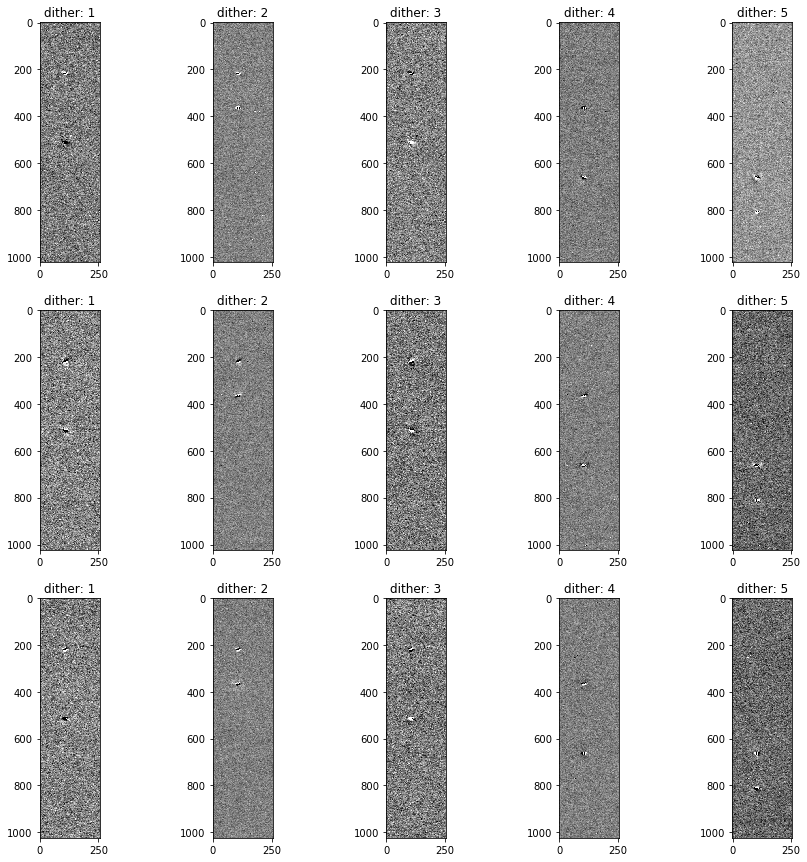

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for n,key in enumerate(U1.keys()):
    vmin1, vmax1 = interval.get_limits(U1[key])
    vmin2, vmax2 = interval.get_limits(U2[key])
    vmin3, vmax3 = interval.get_limits(U2[key])
    
    #Q1: nframe1
    ax[0,n].imshow(U1[key], vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[0,n].set_title('dither: {}'.format(n+1))
    #Q2: nframe2
    ax[1,n].imshow(U2[key], vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[1,n].set_title('dither: {}'.format(n+1))
    #Q3 nframe3
    ax[2,n].imshow(U3[key], vmin=vmin3, vmax=vmax3, cmap='gray')
    ax[2,n].set_title('dither: {}'.format(n+1))

In [70]:
PI3.keys()

[0, 1, 2, 3, 4]

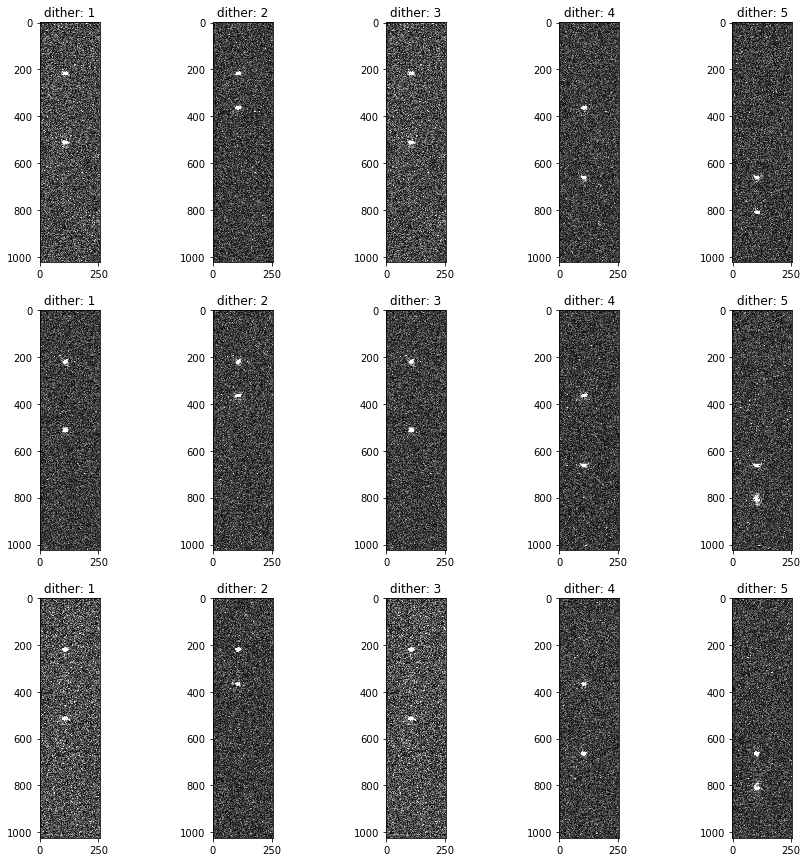

In [72]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for i in range(5):
    vmin1, vmax1 = interval.get_limits(PI1[i])
    vmin2, vmax2 = interval.get_limits(PI2[i])
    vmin3, vmax3 = interval.get_limits(PI3[i])
    
    ax[0,i].imshow(PI1[i], vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[0,i].set_title('dither: {}'.format(i+1))
    ax[1,i].imshow(PI2[i], vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[1,i].set_title('dither: {}'.format(i+1))
    ax[2,i].imshow(PI3[i], vmin=vmin3, vmax=vmax3, cmap='gray')
    ax[2,i].set_title('dither: {}'.format(i+1))

## median combined I, Q, U, PI (per dither)

In [66]:
Q_med = {}
for n,key in enumerate(Q1.keys()):
    Q_med[n] = []
    #dither 1
    Q_med[n].append(Q1[key])
    Q_med[n].append(Q2[key])
    Q_med[n].append(Q3[key])
    #stack
    Q_med[n]=np.median(Q_med[n],axis=0)
    
U_med = {}
for n,key in enumerate(U1.keys()):
    U_med[n] = []
    #dither 1
    U_med[n].append(U1[key])
    U_med[n].append(U2[key])
    U_med[n].append(U3[key])
    #stack
    U_med[n]=np.median(U_med[n],axis=0)
    
PI_med = {}
for n,key in enumerate(PI1.keys()):
    PI_med[n] = []
    #dither 1
    PI_med[n].append(PI1[key])
    PI_med[n].append(PI2[key])
    PI_med[n].append(PI3[key])
    #stack
    PI_med[n]=np.median(PI_med[n],axis=0)

## Stacked Q,U per dither

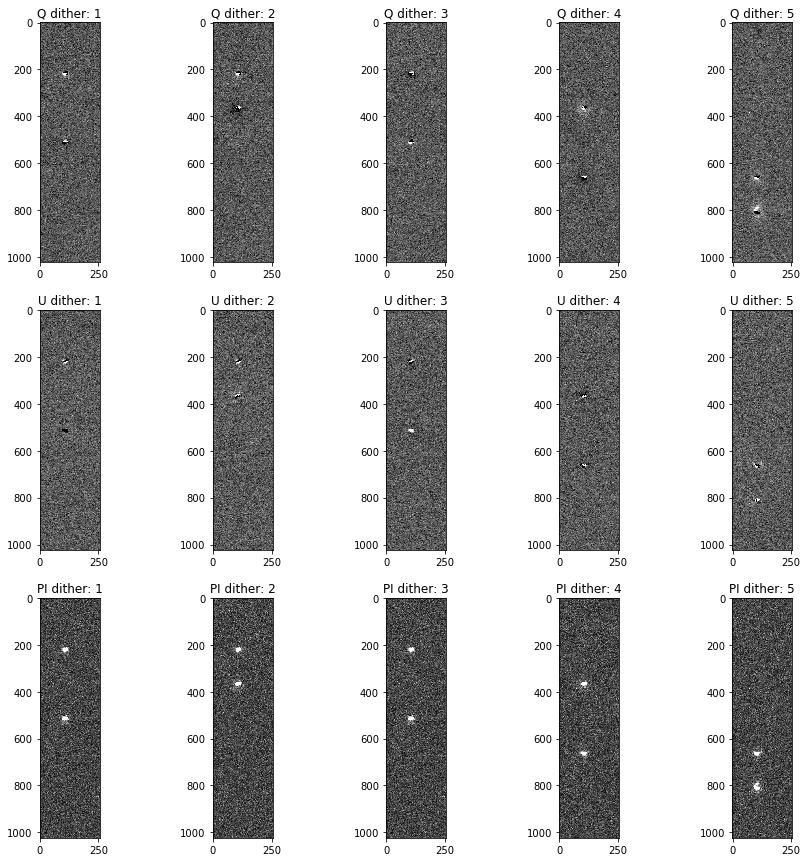

In [67]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for i in range(5):
    vmin1, vmax1 = interval.get_limits(Q_med[n])
    vmin2, vmax2 = interval.get_limits(U_med[n])
    vmin3, vmax3 = interval.get_limits(PI_med[n])
    
    ax[0,i].imshow(Q_med[i], vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[0,i].set_title('Q dither: {}'.format(i+1))
    ax[1,i].imshow(U_med[i], vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[1,i].set_title('U dither: {}'.format(i+1))
    ax[2,i].imshow(PI_med[i], vmin=vmin3, vmax=vmax3, cmap='gray')
    ax[2,i].set_title('PI dither: {}'.format(i+1))

## Combine dithered PI

In [76]:
ircs_pix_size = 20.57*1e-3
strip_width = 4.4
separation = strip_width/ircs_pix_size
dith_size = 3.0 #arcsec #pf.getheader(skysub_ch1[0])['I_DTHSZ']
dith_size_pix = dith_size/ircs_pix_size

In [77]:
dith_size_pix

145.84346135148274

In [82]:
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=30.0, threshold=5.*std)  

data = PI_med[0]
mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)

sources = daofind(data - median)  

In [83]:
sources

<Table length=5>
  id    xcentroid     ycentroid   ...      flux           mag      
int64    float64       float64    ...    float64        float64    
----- ------------- ------------- ... ------------- ---------------
    1 107.642306414 219.436198533 ... 169.221496343  -5.57113882746
    2 147.928923733  257.53285233 ...    1.39998341 -0.365307223146
    3 106.318285871  513.11520349 ... 160.500983539  -5.51369424519
    4 143.723201279  742.58841153 ... 1.26091168192 -0.251711670842
    5 132.221283096 976.953277029 ... 1.73578747157 -0.598741373563

## Crop

In [ ]:
#these should be edited from config file
centroid_dither_1_left = (620,520)
centroid_dither_1_right = (880,520)
centroid_dither_2_left = (620,230)
centroid_dither_2_right = (880,230)
centroid_dither_3_left = (620,380)
centroid_dither_3_right = (880,380)
centroid_dither_4_left = (620,670)
centroid_dither_4_right = (880,670)
centroid_dither_5_left = (620,820)
centroid_dither_5_right = (880,820)

